Initial State: {'lights': 'off', 'thermostat': 22, 'door_lock': 'unlocked', 'time_of_day': 'morning', 'presence': False}


<ipython-input-1-5b5f35ddb983>:38: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = Rectangle((0.1, i + 0.1), 0.8, 0.8, color=color, edgecolor="black")


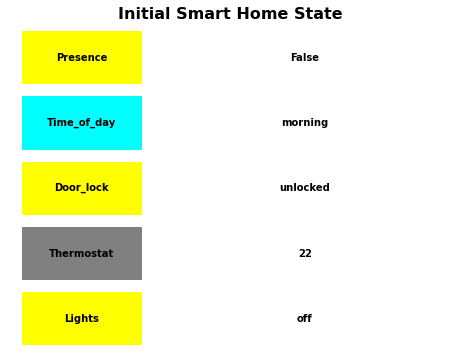

Updated State: {'lights': 'off', 'thermostat': 22, 'door_lock': 'locked', 'time_of_day': 'morning', 'presence': False}
Updated State: {'lights': 'on', 'thermostat': 22, 'door_lock': 'locked', 'time_of_day': 'evening', 'presence': True}


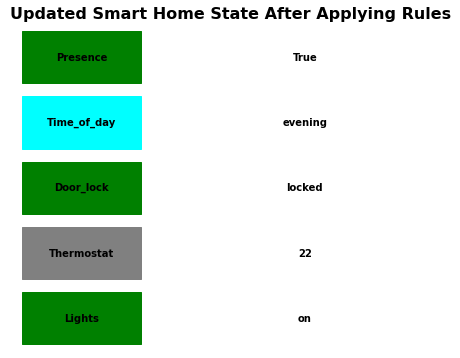

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
 
# Initial smart home state
smart_home = {
    "lights": "off",
    "thermostat": 22,
    "door_lock": "unlocked",
    "time_of_day": "morning",
    "presence": False
}
 
# Visualization function
def visualize_state_grid(home_state, title="Smart Home State"):
    # Set up the plot
    fig, ax = plt.subplots(figsize=(8, 6))
   
    # Define grid size based on the number of devices in home_state
    ax.set_xlim(0, 3)  # Set X-axis limit (3 columns: device name, state, status)
    ax.set_ylim(0, len(home_state))  # Set Y-axis limit (number of devices)
    ax.set_title(title, fontsize=16, fontweight="bold")
    ax.axis("off")  # Turn off the axis
   
    # Define colors for each state based on device type
    color_map = {
        "on": "green", "off": "yellow",
        "locked": "green", "unlocked": "yellow",
        True: "green", False: "yellow",
        "morning": "aqua", "evening": "aqua"
    }
   
    # Place each device state as a colored rectangle in the grid
    for i, (device, state) in enumerate(home_state.items()):
        # Define the color based on the state
        color = color_map.get(state, "gray")  # Default to gray if state is not in color_map
       
        # Create a rectangle for the device state
        rect = Rectangle((0.1, i + 0.1), 0.8, 0.8, color=color, edgecolor="black")
        ax.add_patch(rect)
       
        # Add device name and state text
        ax.text(0.5, i + 0.5, device.capitalize(), va="center", ha="center", fontweight="bold", color="black")
        ax.text(2, i + 0.5, str(state), va="center", ha="center", fontweight="bold", color="black")
   
    # Display the plot
    plt.show()
 
# Define the function to apply rules
def apply_rules(home):
    # Rule 1: Turn on lights in the evening if someone is home
    if home["time_of_day"] == "evening" and home["presence"]:
        home["lights"] = "on"
   
    # Rule 2: Adjust thermostat if it's cold and someone is home
    if home["thermostat"] < 20 and home["presence"]:
        home["thermostat"] = 22
   
    # Rule 3: Lock doors if no one is home
    if not home["presence"]:
        home["door_lock"] = "locked"
   
    # Rule 4: Set morning thermostat if someone is home
    if home["time_of_day"] == "morning" and home["presence"]:
        home["thermostat"] = 20
   
    return home
 
# Display the initial state of the smart home
print("Initial State:", smart_home)
visualize_state_grid(smart_home, title="Initial Smart Home State")
 
# Apply the rules and get updated home state
updated_home = apply_rules(smart_home)
 
# Print the updated state
print("Updated State:", updated_home)
 
# Now, update the home conditions to test the rules
smart_home["time_of_day"] = "evening"
smart_home["presence"] = True  # Someone is home
smart_home["thermostat"] = 18  # Set thermostat to test adjustment rule
 
# Apply the rules again and get updated home state
updated_home = apply_rules(smart_home)
 
# Print the updated state
print("Updated State:", updated_home)
 
# Visualize the updated state after applying rules
visualize_state_grid(updated_home, title="Updated Smart Home State After Applying Rules")